In [ ]:
# Copyright 2020 IITK EE604A Image Processing. All Rights Reserved.
# 
# Licensed under the MIT License. Use and/or modification of this code outside of EE604 must reference:
#
# © IITK EE604A Image Processing 
# https://github.com/ee604/ee604_assignments
#
# Author: Shashi Kant Gupta, Chiranjeev Prachand and Prof K. S. Venkatesh, Department of Electrical Engineering, IIT Kanpur

# Task 1: Image Enhancement I: Intensity Level

In this task, we will implement following two methods which was taught in class:
1. Gamma modification
2. Histogram equalization

In [4]:
%%bash
pip install git+https://github.com/ee604/ee604_plugins

  Cloning https://github.com/ee604/ee604_plugins to /tmp/pip-req-build-tq2067ut
  Created wheel for ee604-plugins: filename=ee604_plugins-0.2.2-cp36-none-any.whl size=2313 sha256=55e9aa7ecaecaa0f28fd5d4ad36ee24a61e31b647020cf360d3931967d8fe752
  Stored in directory: /tmp/pip-ephem-wheel-cache-a0m6oa71/wheels/34/a8/1d/ae3b7d209ecde89b4800a47ec55a61e7503bb9548bbb975806
Successfully built ee604-plugins


  Running command git clone -q https://github.com/ee604/ee604_plugins /tmp/pip-req-build-tq2067ut


In [5]:
# Importing required libraries

import cv2
import numpy as np
import matplotlib.pyplot as plt

from ee604_plugins import download_dataset, cv2_imshow
download_dataset(assignment_no=2, task_no=1) # download data for this assignment

Download Complete!


In [6]:
def gamma_modification(img, gamma=1):
    '''
    Write your program to apply gamma (power law) modification to input image.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + gamma - gamma (power law) parameter
    
    Ouputs:
    + out_img - gamma modified grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + Basic numpy operations
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...
    temp = (img/255)**gamma
    out_img = np.clip(temp, a_min=0, a_max=1)*255
    out_img = out_img.astype(np.uint8)

    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [7]:
def histogram_equalization_global(img):
    '''
    Write your program to equalise the intesnity level of the given image using histogram equalization method.
    In this one you have to use the global statistics of the image.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    
    Ouputs:
    + out_img - histogram equalized grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + You are allowed to use np.histogram or any relevant numpy module
    + You are not allowed t use cv2.equalizeHist or any other direct implementations
    
    Hint:
    + Not needed.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...

    pdf = np.zeros((256))

    pdf, _ = np.histogram(img, bins=np.arange(257))

    cdf = np.cumsum(pdf) # CDF (0-255)
    cdf -= cdf[0]

    if cdf[-1] > cdf[0]:
        cdf = cdf/(cdf[-1] - cdf[0])

    cdf *= 255
    cdf = cdf.astype(np.uint8)
    out_img = cdf[img] 

    #############################
    # End your code here ########
    #############################    
    
    return out_img

In [8]:
def histogram_equalization_local(img, kernel_size=15):
    '''
    Write your program to equalise the intesnity level of the given image using histogram equalization method.
    In this one you have to use the global statistics of the image.
    
    Inputs:
    + img - grayscaled image of size N x N
          - values between [0, 255] - 'uint8'
    + kernel_size - size of the kernel window which should be considered for
                  - the local statistics of the image
    
    Ouputs:
    + out_img - locally histogram equalized grayscaled image of size N x N
              - values between [0, 255] - 'uint8'
    
    Allowed modules:
    + You are allowed to use np.histogram or any relevant numpy module
    + You are not allowed t use cv2.equalizeHist or any other direct implementations
    
    Hint:
    + Loop across all the points (i, j) in the input image and take [k, k] size window centered at (i, j). 
      Apply histogram_equalization_global() on the cropped window. Note you need to adjust your code for borders
    + Above mentioned method is not an efficient method and tiling method can be used but that will be
      more complex as you need to interpolate to get the final image.
    + Instead you can use incremental update.
    + Wiki link: https://en.wikipedia.org/wiki/Adaptive_histogram_equalization
    + All three method will award you same marks.
    
    '''
    
    #############################
    # Start your code from here #
    #############################
    
    # Replace with your code...

    m = img.shape[0]
    n = img.shape[1]
    tile_img = np.zeros((m, n, 256))
    w = int((kernel_size-1)/2)

    max_x = -1
    max_y = -1
    for i in range(0, m, kernel_size):
        for j in range(0, n, kernel_size):
            centerx = min(i + w, m-1)
            centery = min(j + w, n-1)
            max_x = max(max_x, centerx)
            max_y = max(max_y, centery)

            pdf, _ = np.histogram(img[i:min(i+kernel_size, m), j:min(j+kernel_size, n)], bins=np.arange(257))

            cdf = np.cumsum(pdf)
            cdf -= cdf[0]

            if cdf[-1] > cdf[0]:
                cdf = cdf/(cdf[-1] - cdf[0])

            cdf *= 255
            cdf = cdf.astype(np.uint8)

            tile_img[centerx][centery] = cdf
    
    out_img = np.zeros((m, n))

    # Simple transform for corner pixels
    for i in range(0, w):
        for j in range(0, w):
            out_img[i][j] = tile_img[w][w][img[i][j]]

    for i in range(0, w):
        for j in range(n-w+1, n):
            out_img[i][j] = tile_img[w][max_y][img[i][j]]
    
    for i in range(m-w+1, m):
        for j in range(0, w):
            out_img[i][j] = tile_img[max_x][w][img[i][j]]
    
    for i in range(m-w+1, m):
        for j in range(n-w+1, n):
            out_img[i][j] = tile_img[m-1][max_y][img[i][j]]

    # Linear interpolation for edge pixels
    for i in range(0, w):
        for j in range(w, n-w+1):
            y1 = int(np.floor((j-w)/kernel_size)*kernel_size) + w
            y2 = min(y1 + kernel_size, max_y)

            fin_interp = (y2 - j)/(y2 - y1)*tile_img[w][y1] + (j - y1)/(y2 - y1)*tile_img[w][y2]
            out_img[i][j] = fin_interp[img[i][j]]

    for i in range(m-w+1, m):
        for j in range(w, n-w+1):
            y1 = int(np.floor((j-w)/kernel_size)*kernel_size) + w
            y2 = min(y1 + kernel_size, max_y)

            fin_interp = (y2 - j)/(y2 - y1)*tile_img[max_x][y1] + (j - y1)/(y2 - y1)*tile_img[max_x][y2]
            out_img[i][j] = fin_interp[img[i][j]]
    
    for j in range(0, w):
        for i in range(w, m-w+1):
            x1 = int(np.floor((i-w)/kernel_size)*kernel_size) + w
            x2 = min(x1 + kernel_size, max_x)

            fin_interp = (x2 - i)/(x2 - x1)*tile_img[x1][w] + (i - x1)/(x2 - x1)*tile_img[x2][w]
            out_img[i][j] = fin_interp[img[i][j]]
    
    for j in range(n-w+1, n):
        for i in range(w, m-w+1):
            x1 = int(np.floor((i-w)/kernel_size)*kernel_size) + w
            x2 = min(x1 + kernel_size, max_x)

            fin_interp = (x2 - i)/(x2 - x1)*tile_img[x1][max_y] + (i - x1)/(x2 - x1)*tile_img[x2][max_y]
            out_img[i][j] = fin_interp[img[i][j]]
    
    # Bilinear interpolation for interior pixels
    for i in range(w, m-w+1):
        for j in range(w, n-w+1):
            x1 = int(np.floor((i-w)/kernel_size)*kernel_size) + w
            x2 = min(x1 + kernel_size, max_x)
            y1 = int(np.floor((j-w)/kernel_size)*kernel_size) + w
            y2 = min(y1 + kernel_size, max_y)

            interp1 = (y2 - j)/(y2 - y1)*tile_img[x1][y1] + (j - y1)/(y2 - y1)*tile_img[x1][y2]
            interp2 = (y2 - j)/(y2 - y1)*tile_img[x2][y1] + (j - y1)/(y2 - y1)*tile_img[x2][y2]
            fin_interp = (x2 - i)/(x2 - x1)*interp1 + (i - x1)/(x2 - x1)*interp2

            out_img[i][j] = fin_interp[img[i][j]]

    #############################
    # End your code here ########
    #############################    
    
    return out_img

### Test

---

In [9]:
# Do not change codes inside this cell
# Add your observations in next to next cell
# Your observation should compare the different methods for different images

weeki_img = cv2.imread('data/gamma_modified_Weeki_Wachee_spring.jpg', 0)
hawkes_img = cv2.imread('data/Unequalized_Hawkes_Bay_NZ.jpg', 0)
tsukabi_l = cv2.imread('data/tsukuba_l.png', 0)

def plot_frame(gridx, gridy, subplot_id, img, name):
    plt.subplot(gridx, gridy, 1 + int(subplot_id))
    plt.imshow(np.uint8(img), cmap="gray", vmin=0, vmax=255)
    plt.axis("off")
    plt.title(name)


-------------------------
#   Weeki Wachee
-------------------------


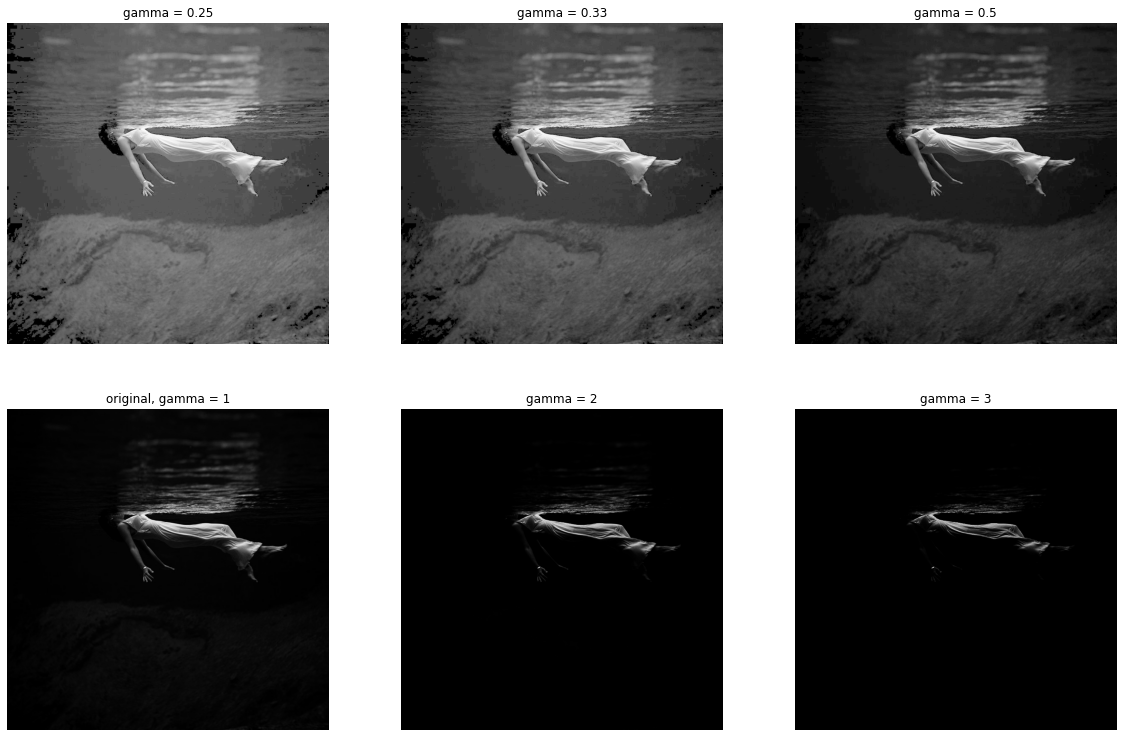


-------------------------
#   Hawkes Bay (NZ)
-------------------------


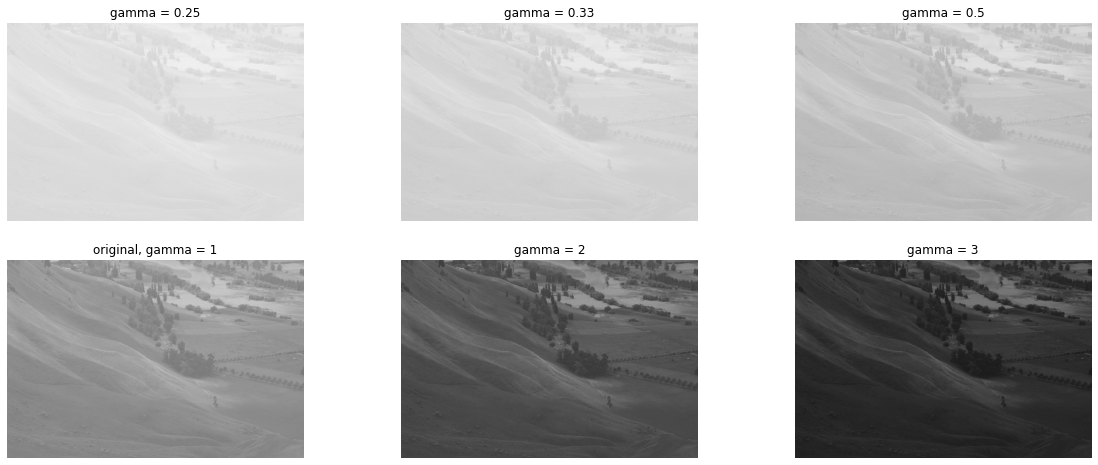

In [10]:
# Do not change codes inside this cell
# Add your observations in next cell

print("\n-------------------------")
print("#   Weeki Wachee")
print("-------------------------")
plt.figure(figsize=(20, 13))
count = 0
for i in [1/4, 1/3, 1/2, 1, 2, 3]:
    tmp_img = gamma_modification(np.copy(weeki_img), gamma=i)
    if i == 1:
        title = "original, gamma = 1"
    else:
        title = "gamma = " + str(round(i, 2))
        
    plot_frame(2, 3, count, tmp_img, title)
    count += 1
plt.show()

print("\n-------------------------")
print("#   Hawkes Bay (NZ)")
print("-------------------------")
plt.figure(figsize=(20, 8))
count = 0
for i in [1/4, 1/3, 1/2, 1, 2, 3]:
    tmp_img = gamma_modification(np.copy(hawkes_img), gamma=i)
    if i == 1:
        title = "original, gamma = 1"
    else:
        title = "gamma = " + str(round(i, 2))
        
    plot_frame(2, 3, count, tmp_img, title)
    count += 1
plt.show()


-------------------------
#    Tsukabi
-------------------------


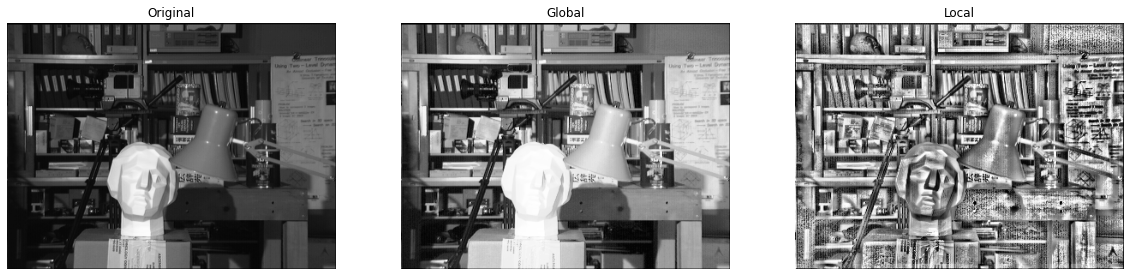


-------------------------
#    Hawkes Bay (NZ)
-------------------------


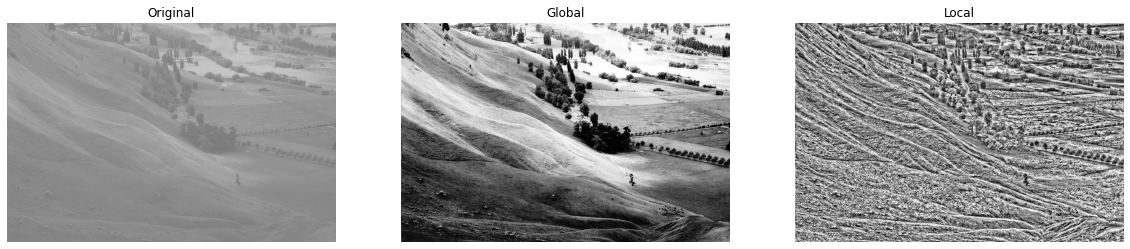


-------------------------
#    Weeki Wachee
-------------------------


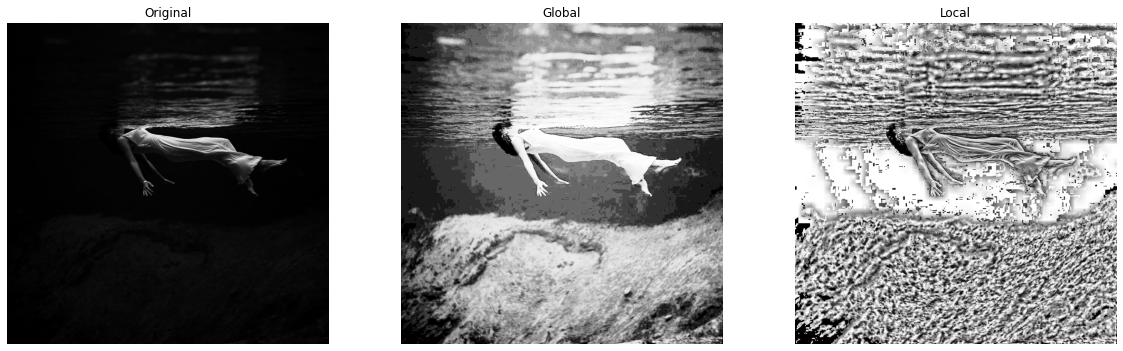

In [11]:
img_arr = [tsukabi_l, hawkes_img, weeki_img]
img_caption = ["Tsukabi", "Hawkes Bay (NZ)", "Weeki Wachee"]
for i in range(0,3):
    print("\n-------------------------")
    print("#   ", img_caption[i])
    print("-------------------------")
    
    plt.figure(figsize=(20, 13))
    plot_frame(2, 3, 0, img_arr[i], "Original")
    
    tmp_img = histogram_equalization_global(np.copy(img_arr[i]))
    plot_frame(2, 3, 1, tmp_img, "Global")
    
    tmp_img = histogram_equalization_local(np.copy(img_arr[i]))
    plot_frame(2, 3, 2, tmp_img, "Local")

    plt.show()

In [12]:
your_observation = """
Gamma modification: 
Weeki Wachee: The original image is quite dark, so gamma>1 makes it too dark. gamma < 1 (particularly gamma=0.5) looks better overall
Hawkes bay: The image is quite light. gamma > 1 works better here to make the individual trees visible.

Histogram equalization:
The global scheme works decently well in all 3 cases. The local histogram equalization scheme gives an odd output in comparison, 
although it is able to capture finer details better in some cases (like the statue in picture 1), however it does amplify noise in other locations.
"""

print(your_observation)


Gamma modification: 
Weeki Wachee: The original image is quite dark, so gamma>1 makes it too dark. gamma < 1 (particularly gamma=0.5) looks better overall
Hawkes bay: The image is quite light. gamma > 1 works better here to make the individual trees visible.

Histogram equalization:
The global scheme works decently well in all 3 cases. The local histogram equalization scheme gives an odd output in comparison, 
although it is able to capture finer details better in some cases (like the statue in picture 1), however it does amplify noise in other locations.



In [ ]:
# Submission >>>>>>>>>>>>>>>>>>>>>
# Do not change codes inside this cell.

gen_imgs = []
blur_img = []

img_arr = [tsukabi_l, hawkes_img, weeki_img]

for i in range(3):
    for j in [1/4, 1/3, 1/2, 1, 2, 3]:
        tmp_img = gamma_modification(np.copy(img_arr[i]), gamma=j)
        gen_imgs.append(tmp_img)
        
    tmp_img = histogram_equalization_global(np.copy(img_arr[i]))
    gen_imgs.append(tmp_img)

    tmp_img = histogram_equalization_local(np.copy(img_arr[i]))
    gen_imgs.append(tmp_img)

task1_submission = np.array(gen_imgs)